In [ ]:
!nvidia-smi

Sun May 26 22:05:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
#!pip install roboflow

# from roboflow import Roboflow

# rf = Roboflow(api_key="OaF01bm2LBX5asqpx0m6")
# project = rf.workspace("berry-zykid").project("button-detection-49hul")
# version = project.version(1)
# dataset = version.download("yolov8")

# VERSION 2 - 202 IMAGES
#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OaF01bm2LBX5asqpx0m6")
project = rf.workspace("berry-zykid").project("button-detection-49hul")
version = project.version(4)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Button-Detection-4 in yolov8:: 100%|██████████| 654/654 [00:00<00:00, 7179.58it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=40 imgsz=800 plots=True

New https://pypi.org/project/ultralytics/8.2.22 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Button-Detection-4/data.yaml, epochs=40, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment

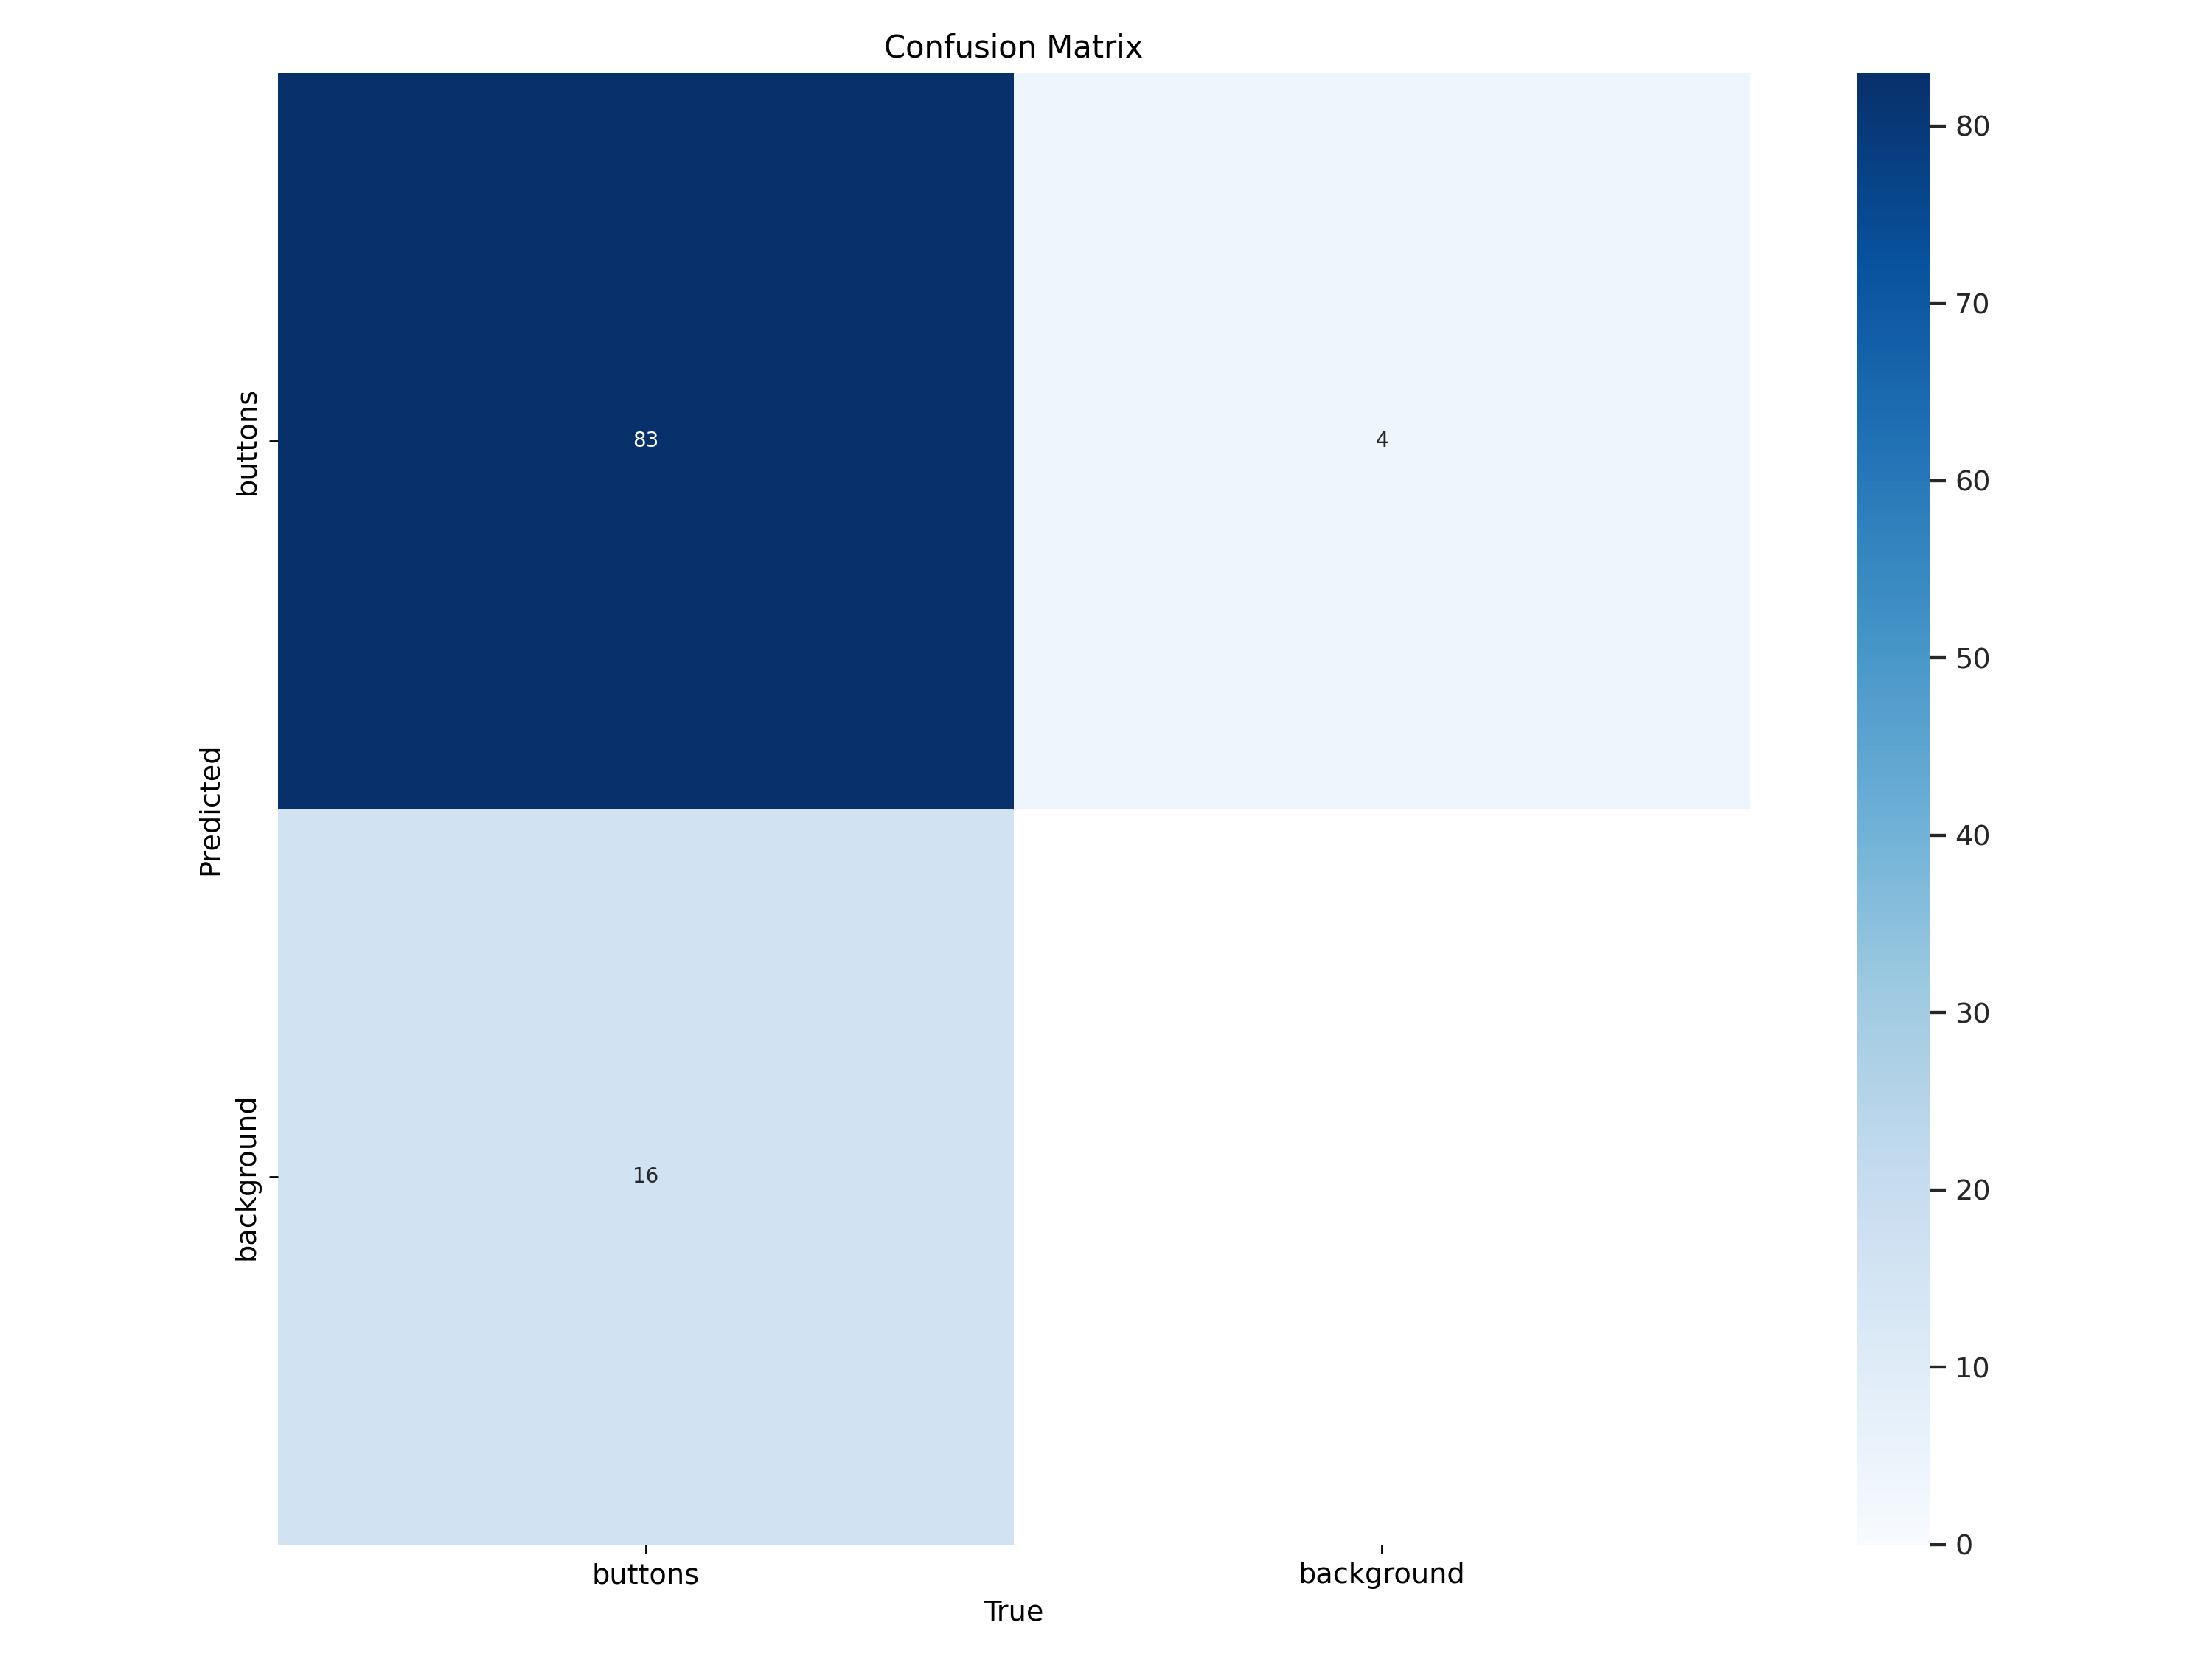

In [ ]:
#%cd {HOME}
Image(filename=f'/content/runs/detect/train5/confusion_matrix.png', width=600)

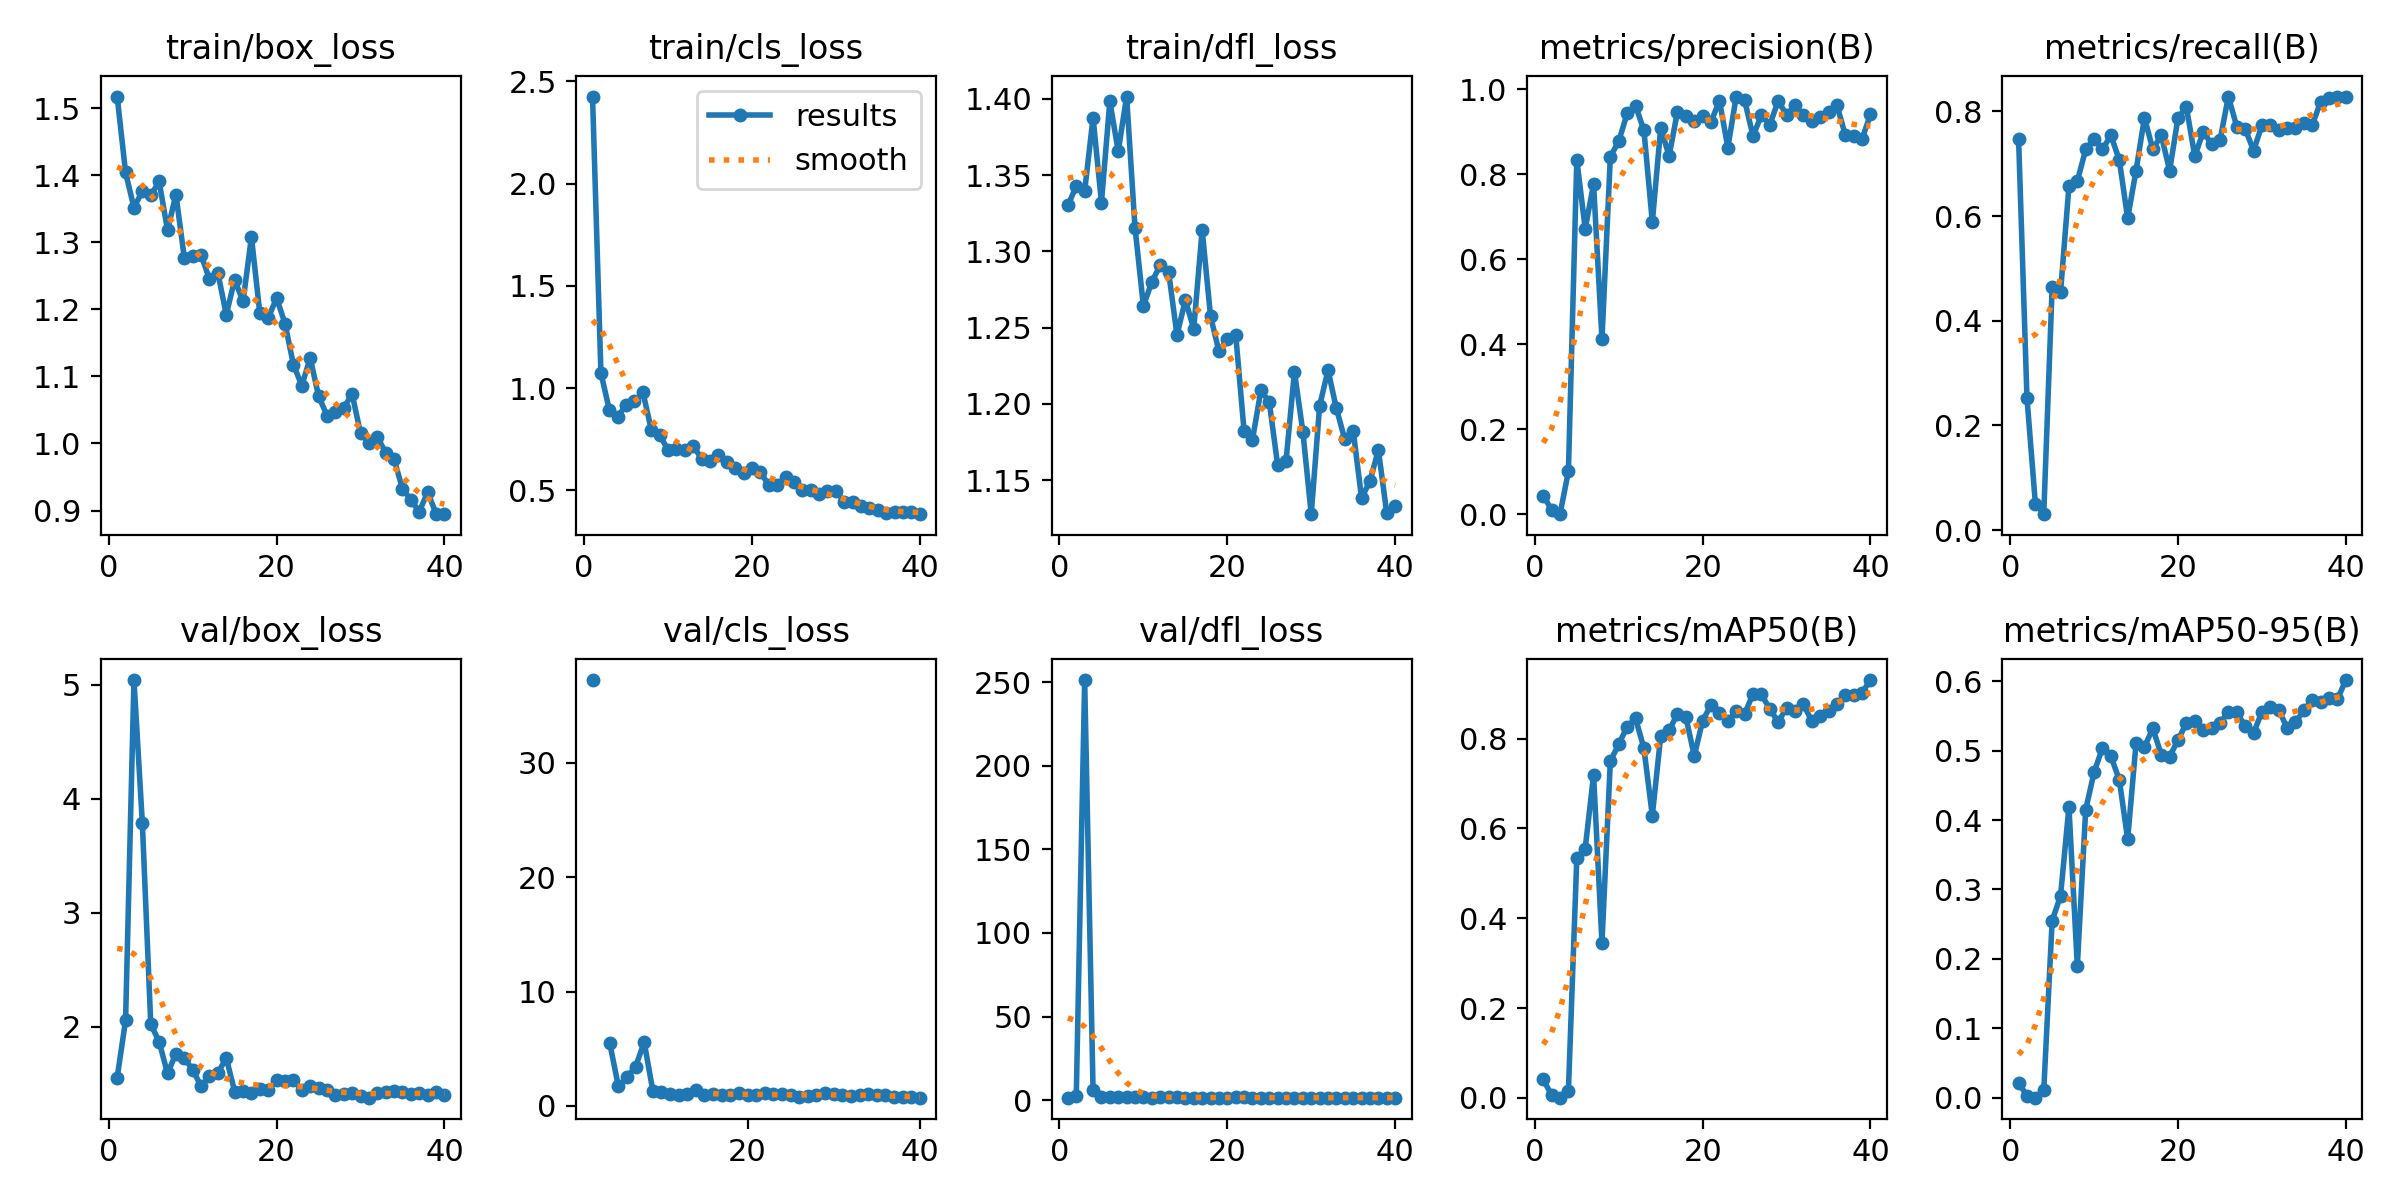

In [ ]:
Image(filename=f'/content/runs/detect/train5/results.png', width=600)

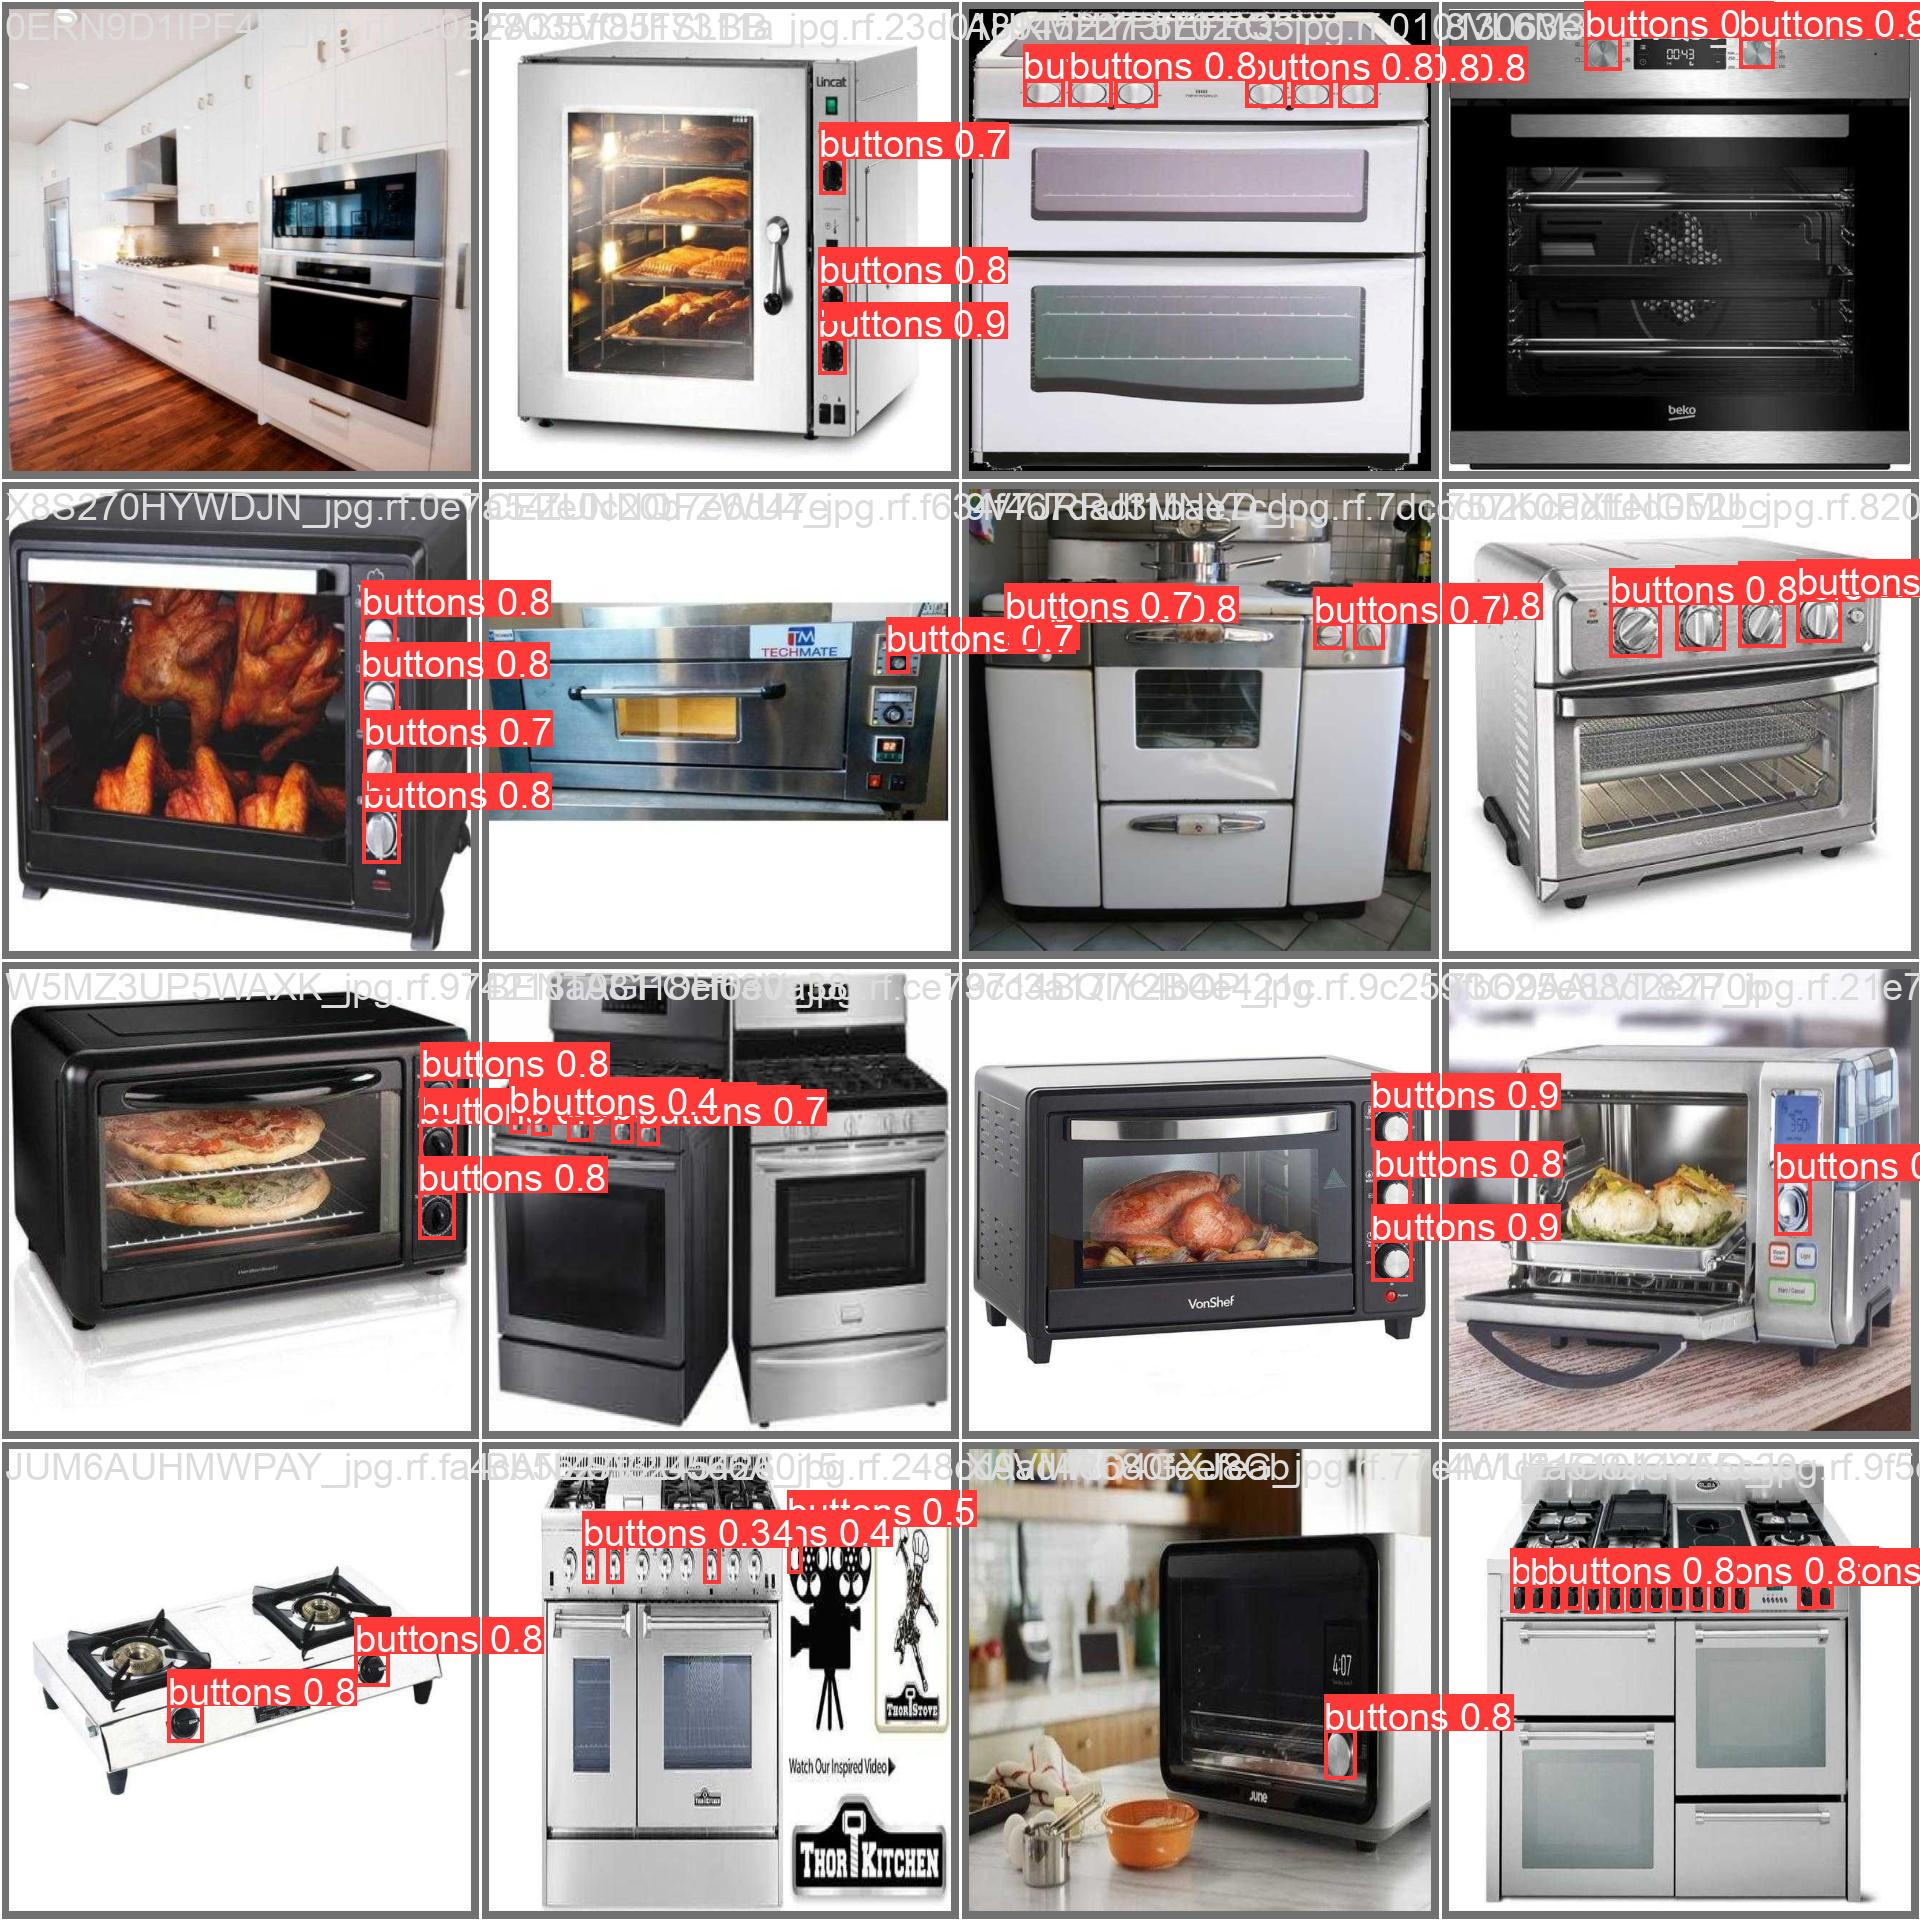

In [ ]:
Image(filename=f'/content/runs/detect/train5/val_batch0_pred.jpg', width=600)

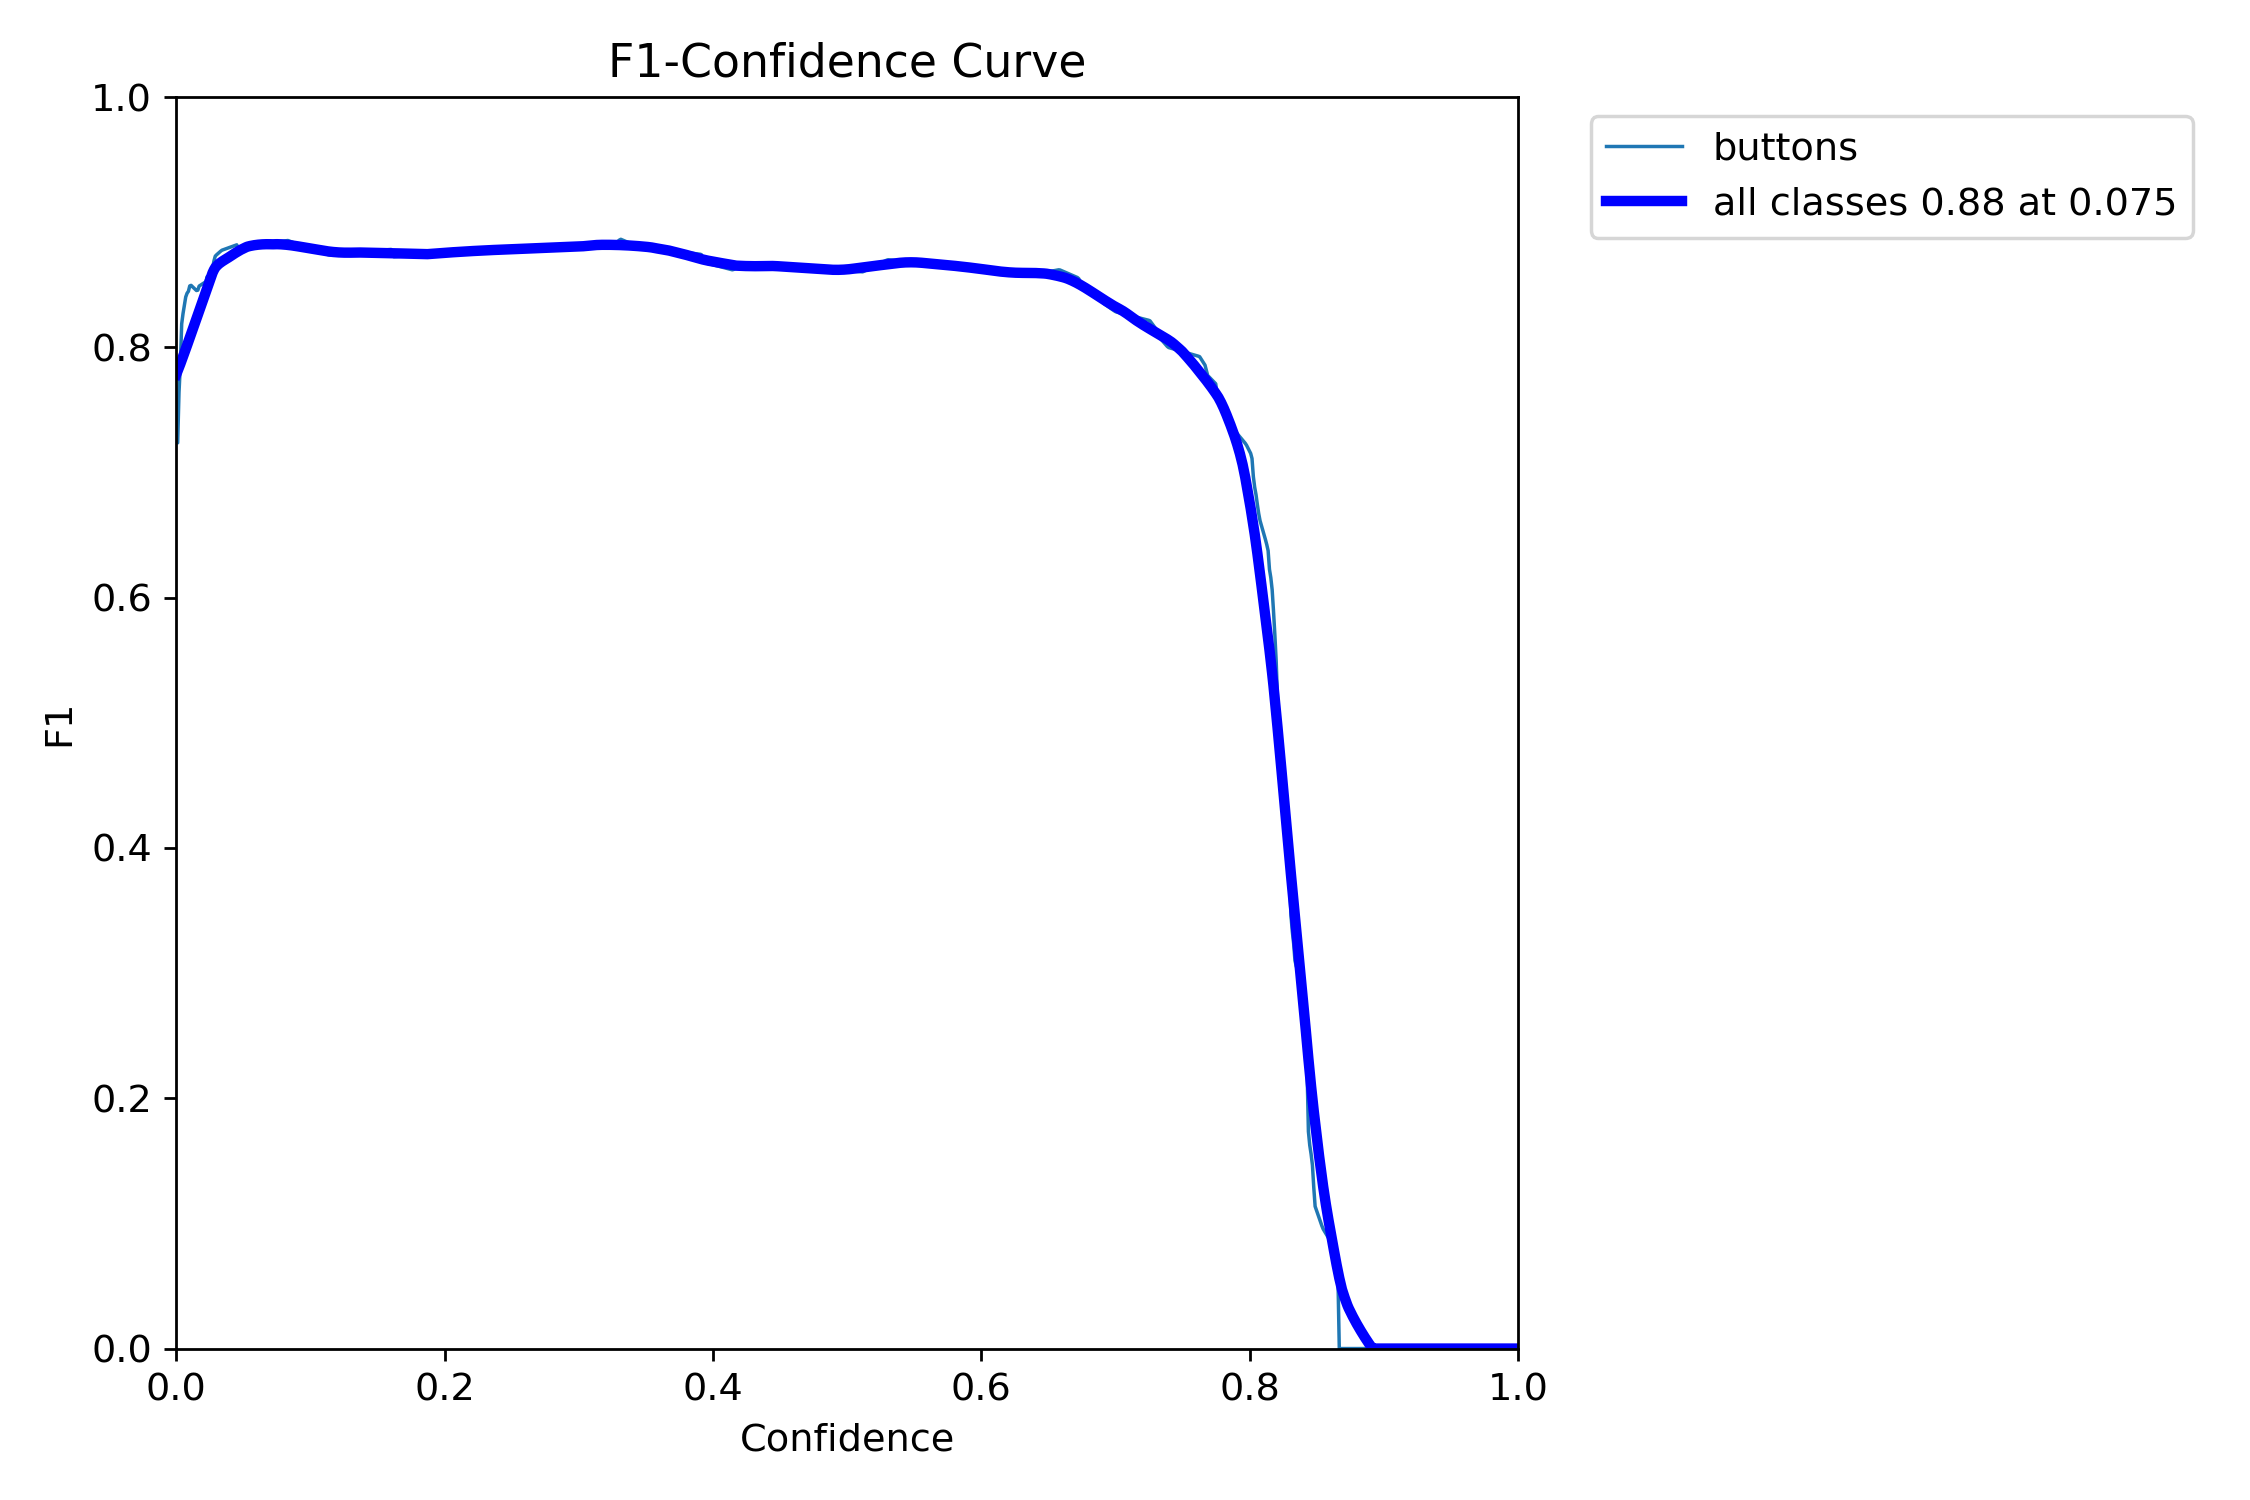

In [ ]:
Image(filename=f'/content/runs/detect/train5/F1_curve.png', width=600)

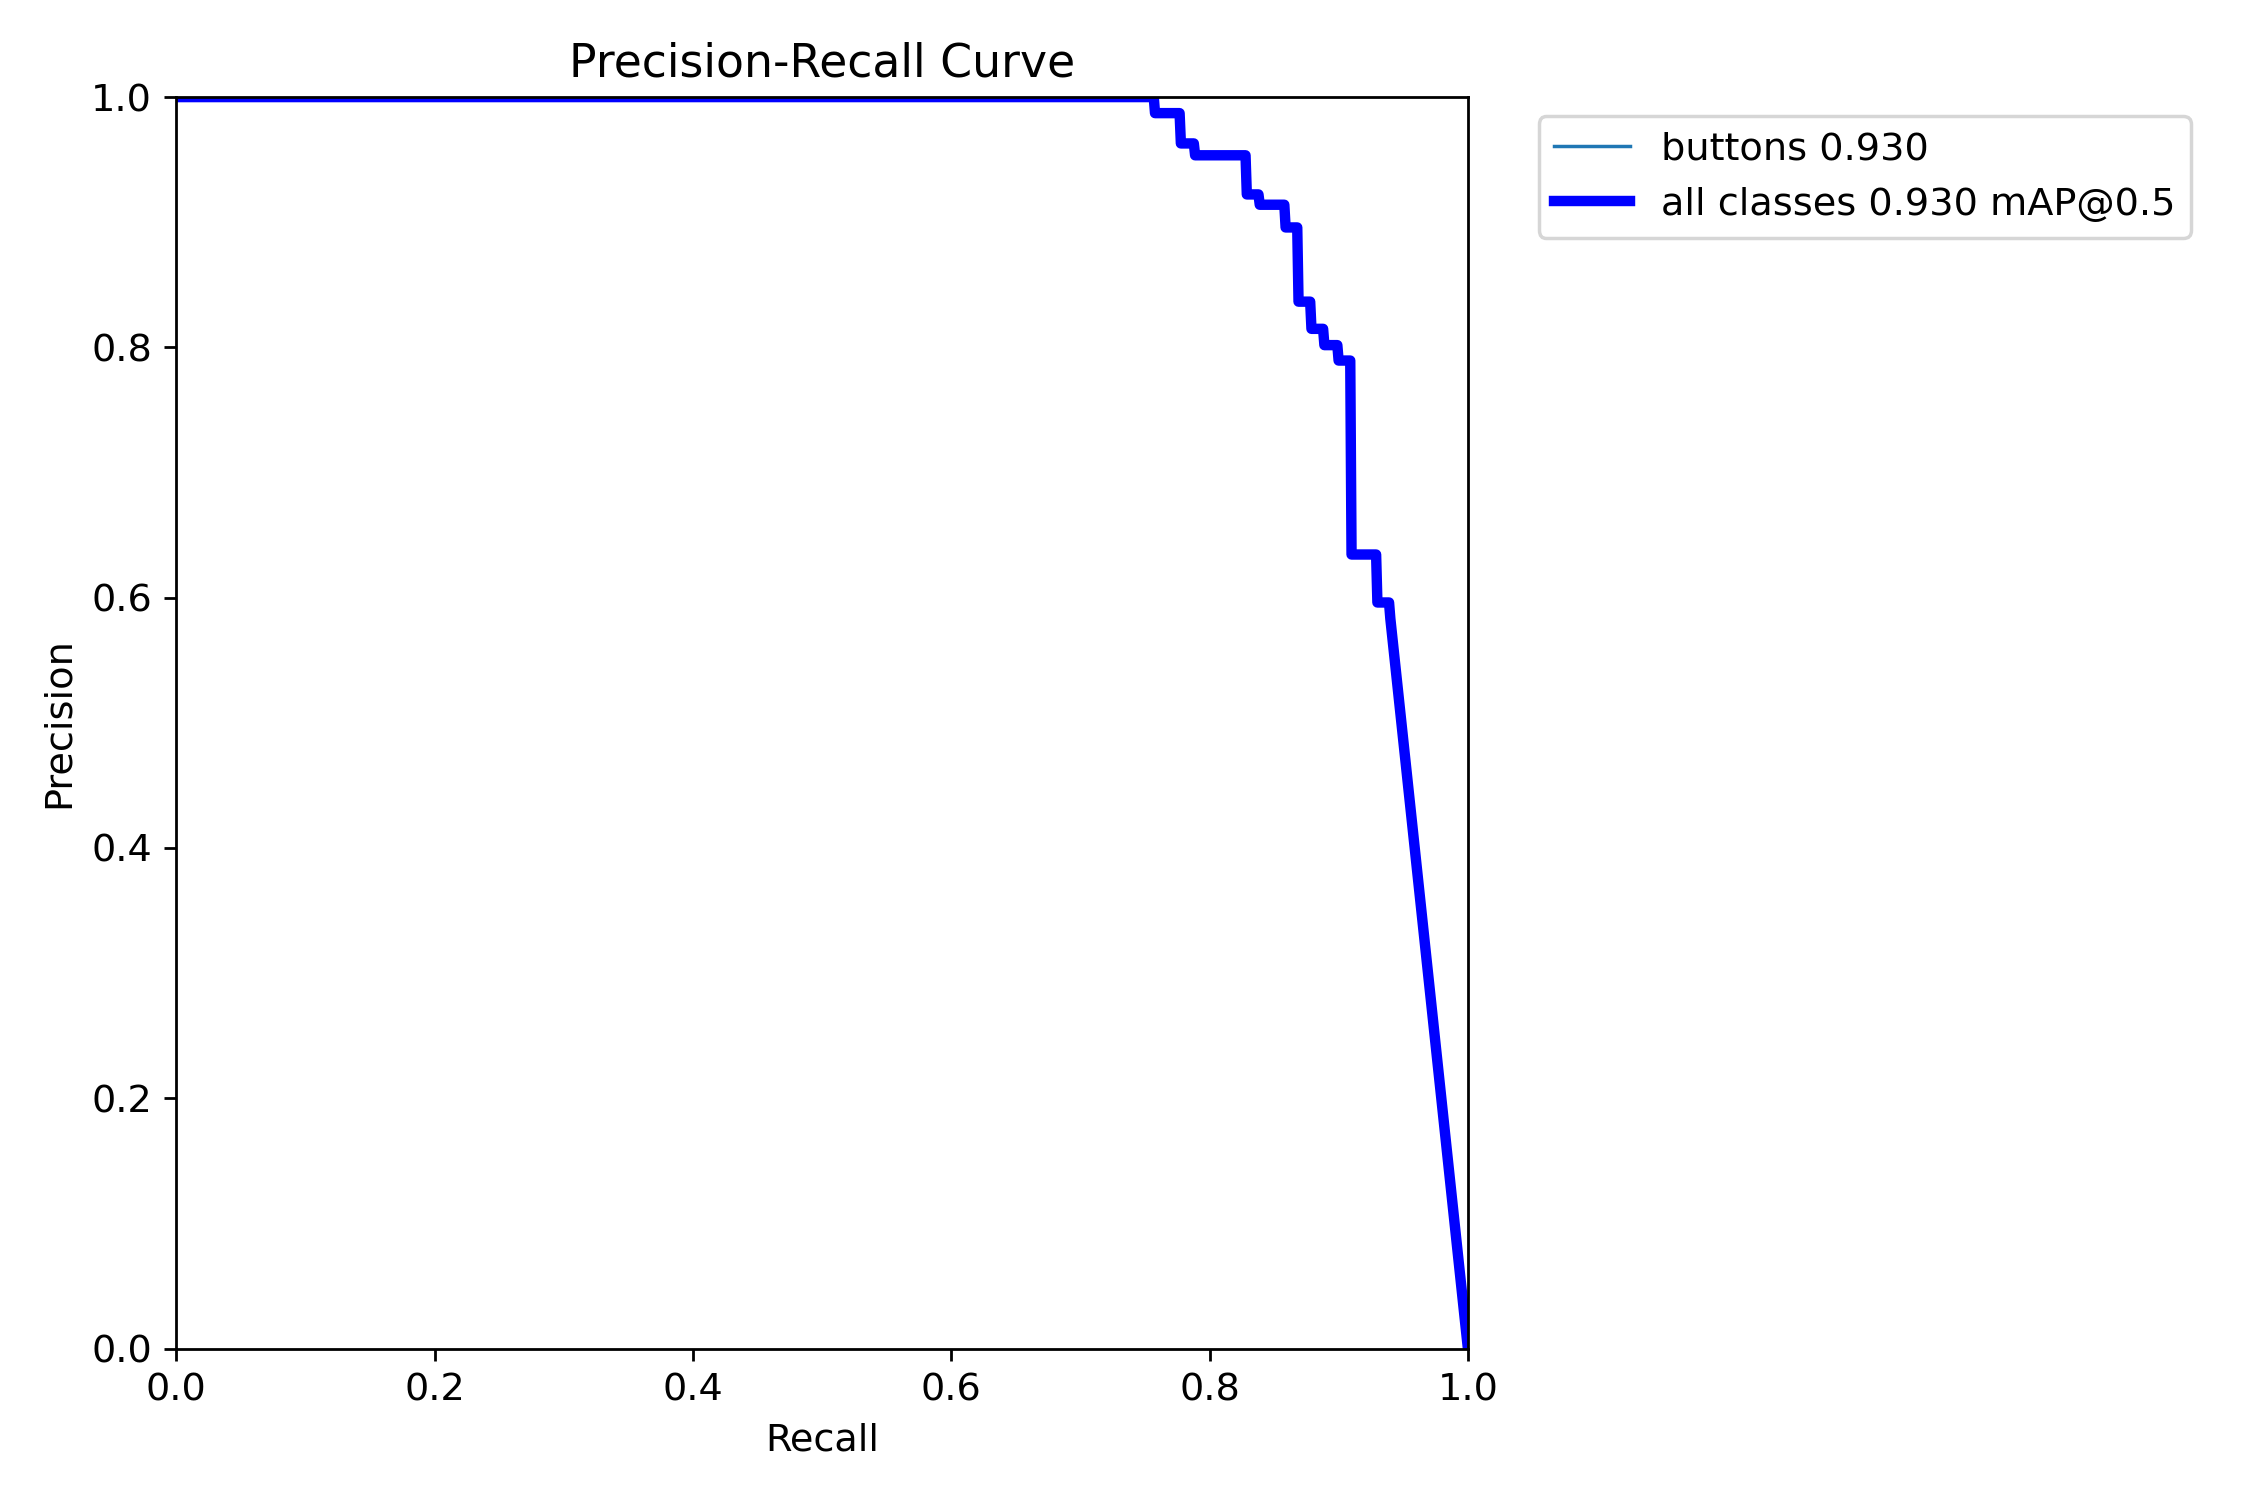

In [ ]:
Image(filename=f'/content/runs/detect/train5/PR_curve.png', width=600)

In [ ]:
# Validate Custom Model

!yolo task=detect mode=val model=/content/runs/detect/train5/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Button-Detection-4/valid/labels.cache... 25 images, 1 backgrounds, 0 corrupt: 100% 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.15s/it]
                   all         25         99       0.94      0.828       0.93      0.598
Speed: 0.3ms preprocess, 41.2ms inference, 0.0ms loss, 20.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train5/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/20 /content/Button-Detection-4/test/images/29YAQ887T38N_jpg.rf.83f7d05628e940ea425f1d9a2d5534be.jpg: 800x800 3 buttonss, 56.9ms
image 2/20 /content/Button-Detection-4/test/images/3A3FPIFEB7W8_jpg.rf.805d4b06c3c4f27e9250d4c9c59424e4.jpg: 800x800 5 buttonss, 56.9ms
image 3/20 /content/Button-Detection-4/test/images/4ZOYTEVZK3AP_jpg.rf.1f2168b5973371e87b938b0ed0fd0f4d.jpg: 800x800 5 buttonss, 55.2ms
image 4/20 /content/Button-Detection-4/test/images/COW21OWGJSKC_jpg.rf.5ccfff5a6b13adc2f53f2abd11147fb8.jpg: 800x800 5 buttonss, 46.1ms
image 5/20 /content/Button-Detection-4/test/images/FIZA6TUILIRA_jpg.rf.e86091220165aad00ca878c51963b743.jpg: 800x800 5 buttonss, 46.2ms
image 6/20 /content/Button-Detection-4/test/images/IB3W09RLNNSJ_jpg.rf.d8254f93a1ac8cef6d0b321581ee6d27.jpg: 800x800 2 buttonss, 46.1ms
image 7/20 /co

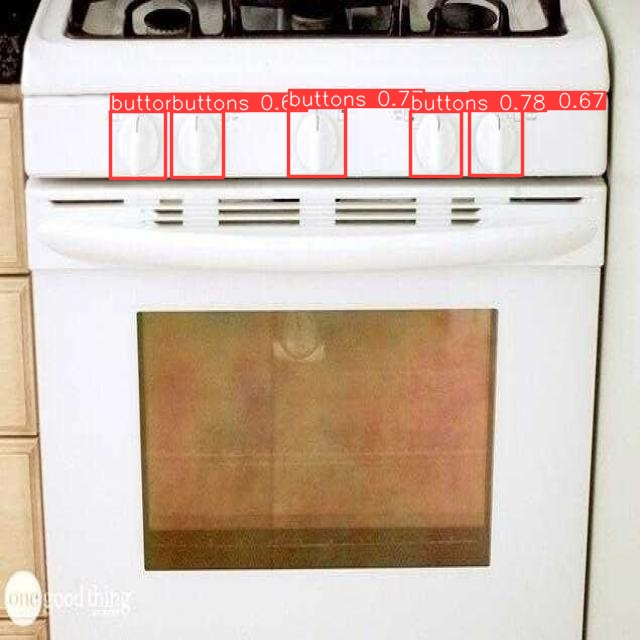

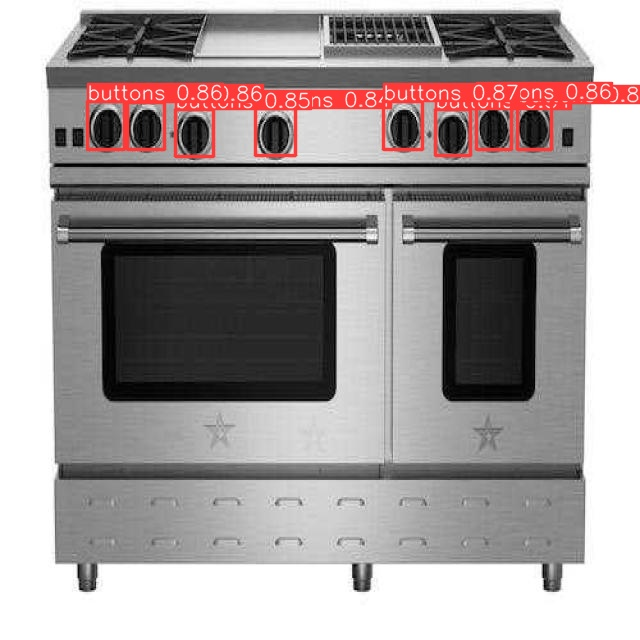

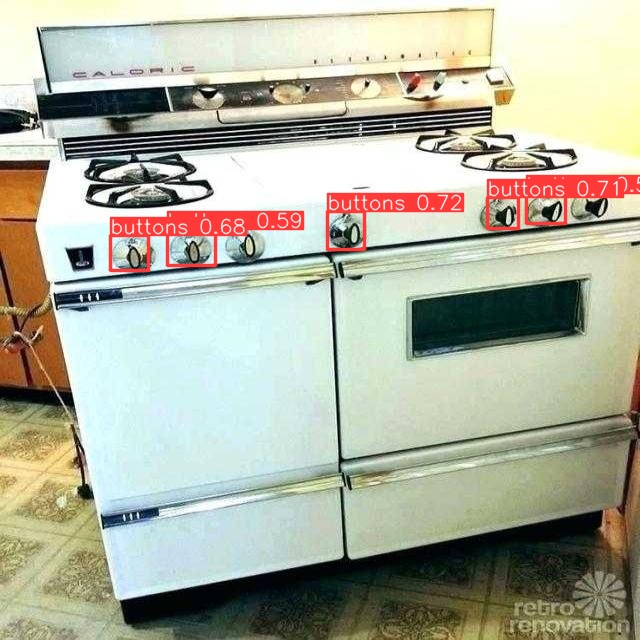

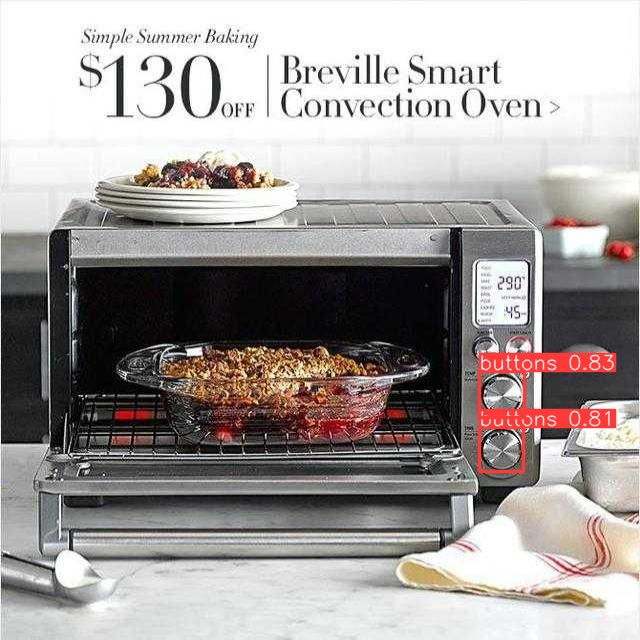

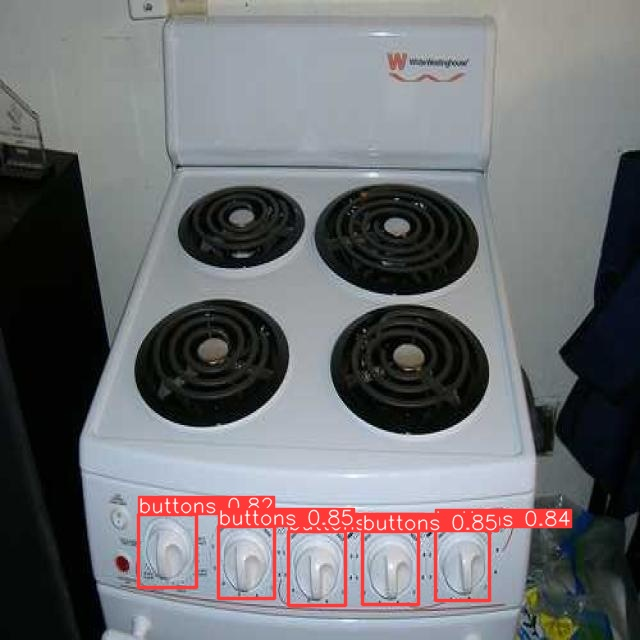

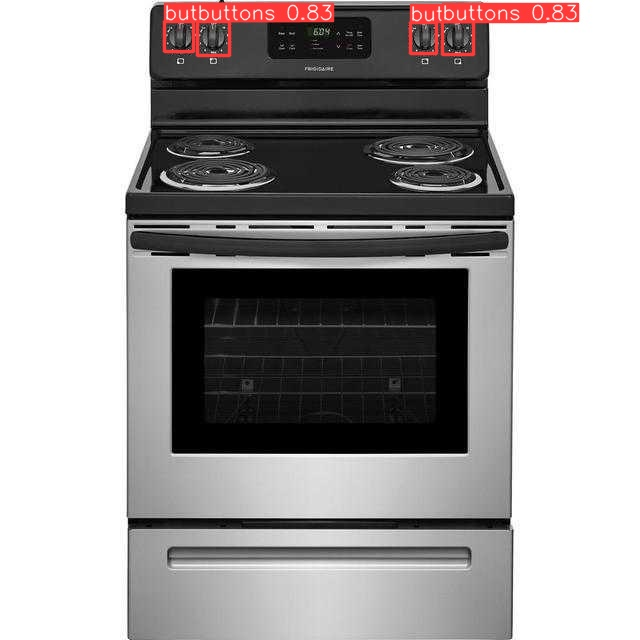

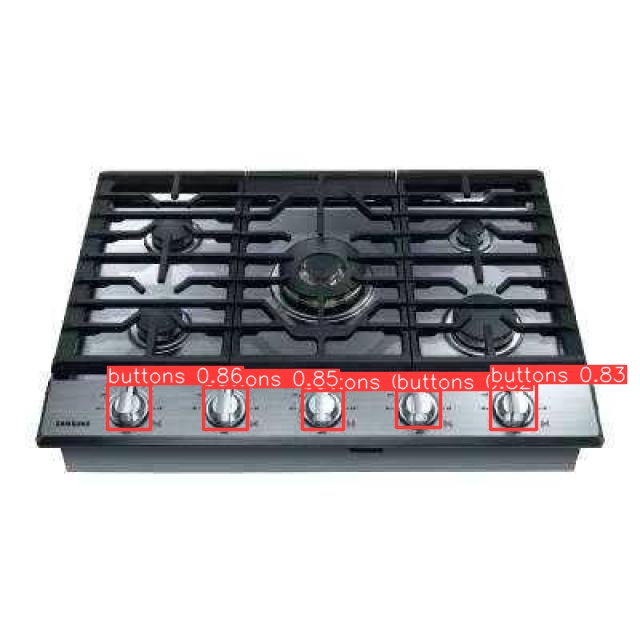

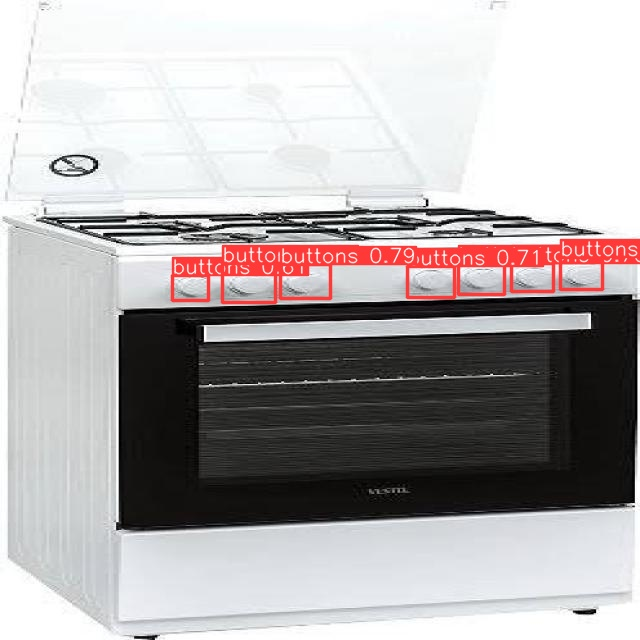

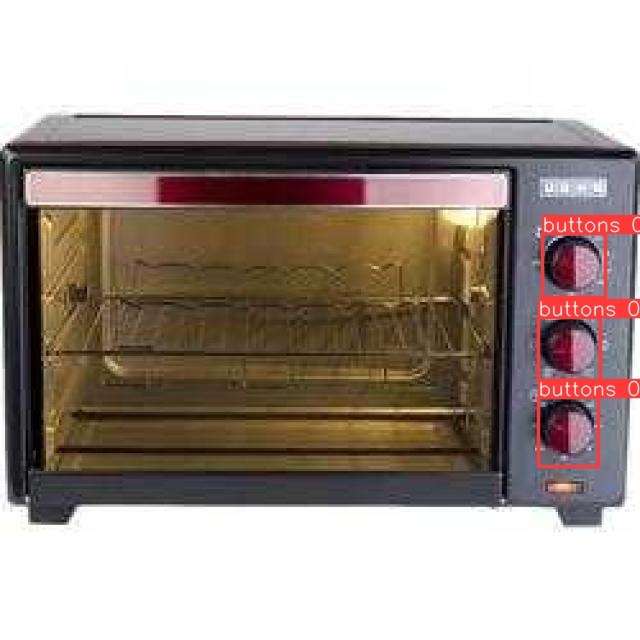

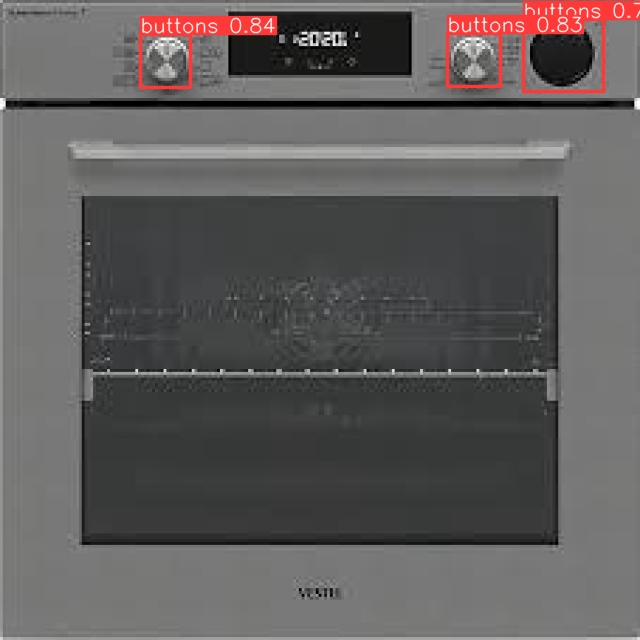

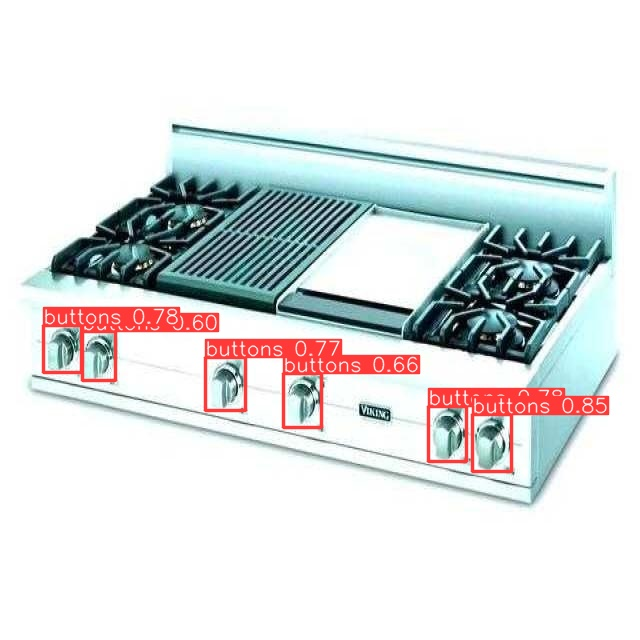

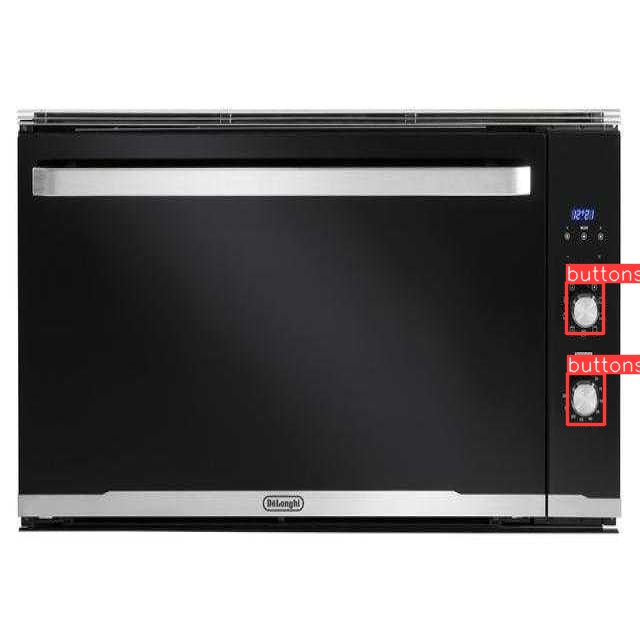

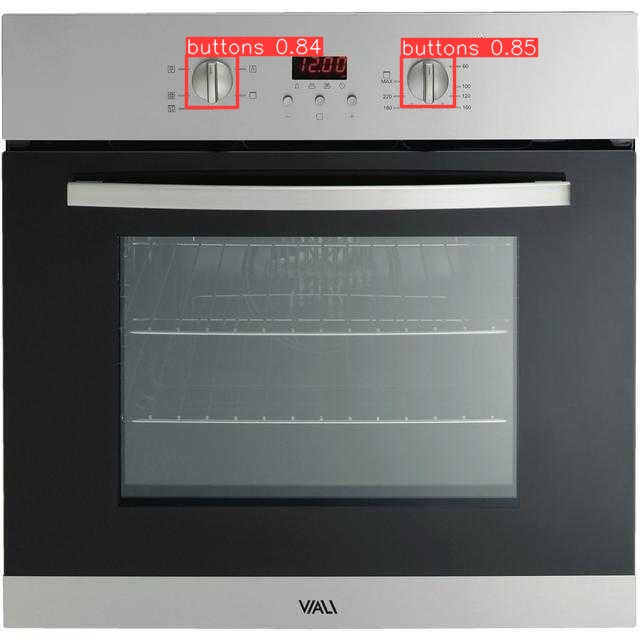

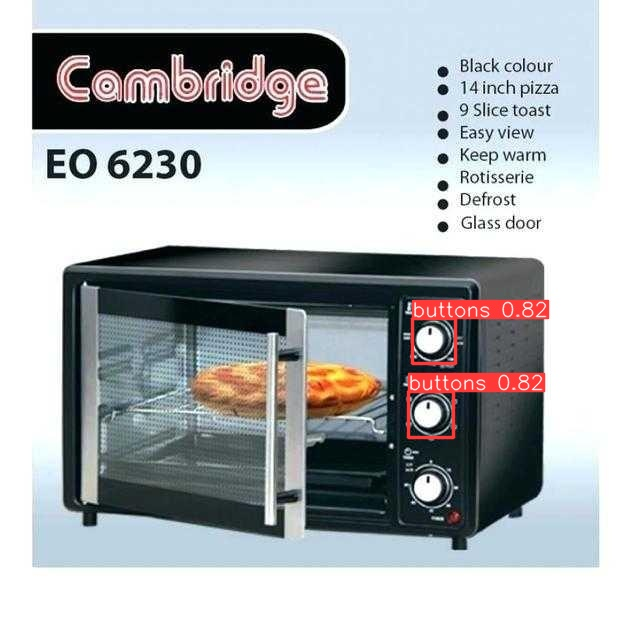

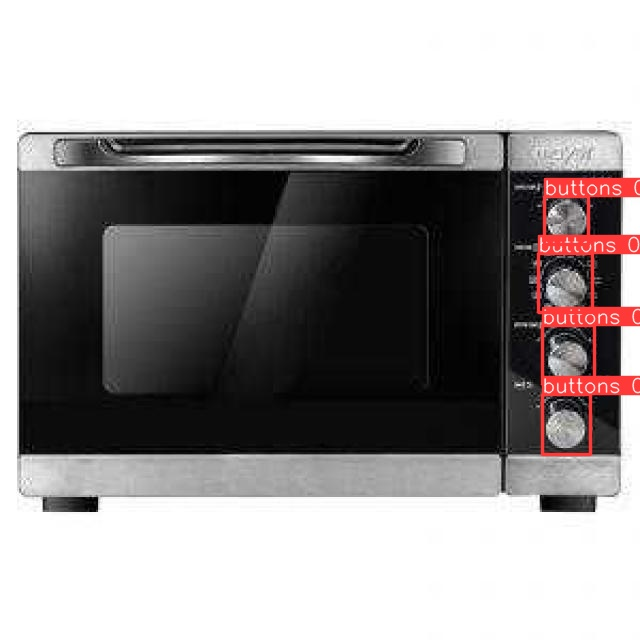

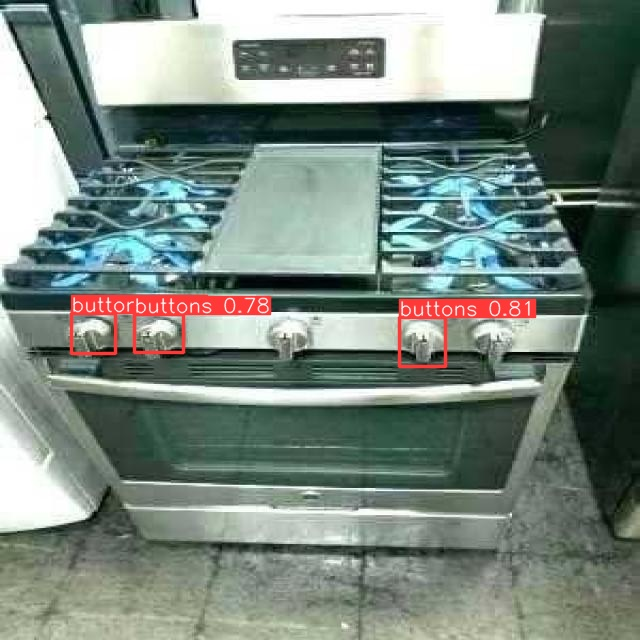

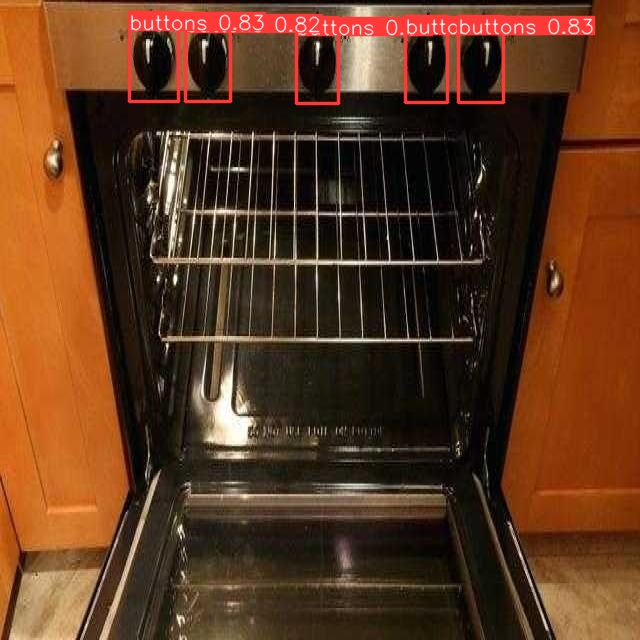

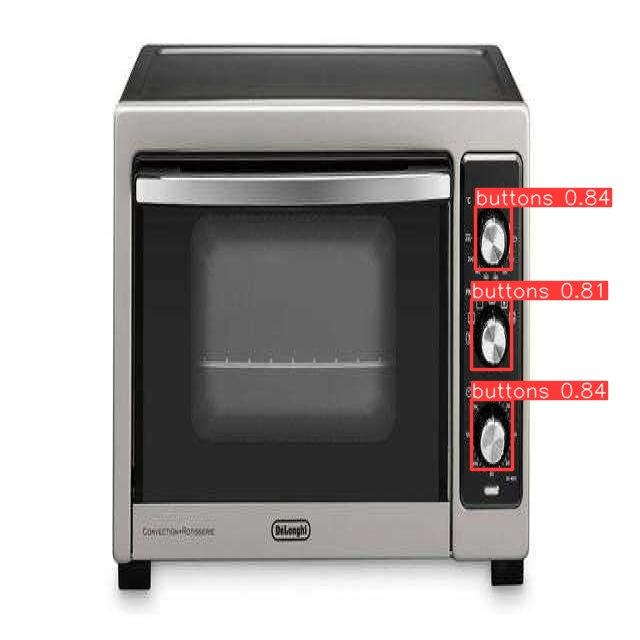

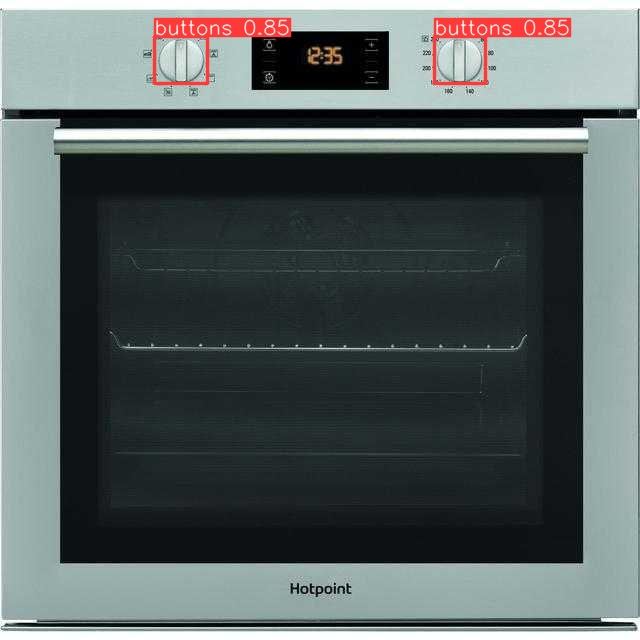

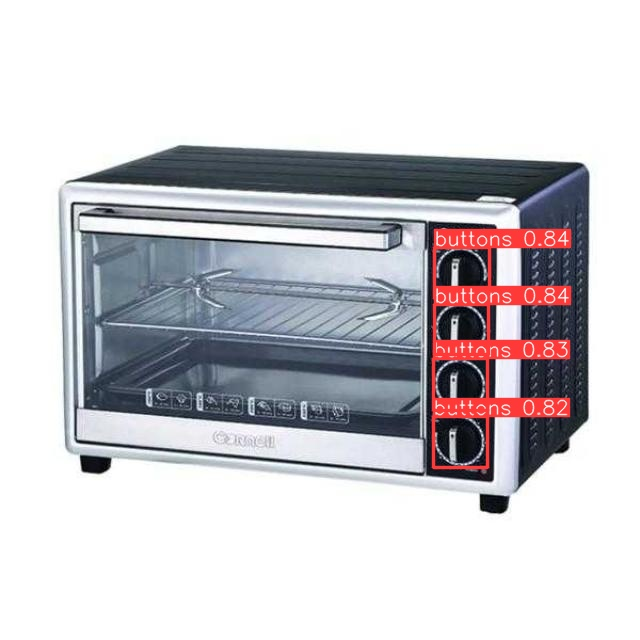

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
# %cd /content/Button-Detection-1/train/
# !zip -r images.zip images/

# from google.colab import files
# files.download('images.zip')

/content/Button-Detection-1/train


# **Getting cropped button images**

In [ ]:
!pip install glob2

In [ ]:
import os
from PIL import Image
import glob

# Define paths to the images and labels directories
image_dir = '/content/Button-Detection-4/test/images'
label_dir = '/content/Button-Detection-4/test/labels'
output_dir = '/content/Button-Detection-4/cropped_buttons_test'

# Get the list of image files and corresponding label files
image_files = glob.glob(os.path.join(image_dir, '*.jpg'))
label_files = {os.path.basename(file).replace('.txt', ''): file for file in glob.glob(os.path.join(label_dir, '*.txt'))}

# Function to convert YOLO coordinates to PIL crop box (left, upper, right, lower)
def yolo_to_pil(x_center, y_center, width, height, image_width, image_height):
    x_center *= image_width
    y_center *= image_height
    width *= image_width
    height *= image_height
    left = x_center - (width / 2)
    top = y_center - (height / 2)
    right = x_center + (width / 2)
    bottom = y_center + (height / 2)
    return left, top, right, bottom

# Process images and save cropped buttons
cropped_images_info = []

for image_file in image_files:
    # Extract base name without the extension to match the label file
    base_name = os.path.basename(image_file).replace('.jpg', '')
    label_file = label_files.get(base_name)

    if label_file:
        print(f"Processing {image_file}...")

        # Load the image
        original_image = Image.open(image_file)
        image_width, image_height = original_image.size

        # Read labels (coordinates) from the corresponding .txt file
        with open(label_file, 'r') as file:
            labels = file.readlines()

        # Process each bounding box
        for i, label in enumerate(labels):
            print(f"  Processing button {i+1}...")

            # Split the label into components: class, x_center, y_center, width, height
            _, x_center, y_center, width, height = map(float, label.strip().split())

            # Convert YOLO coordinates to PIL crop box
            crop_box = yolo_to_pil(x_center, y_center, width, height, image_width, image_height)

            # Crop the image and save it
            cropped_image = original_image.crop(crop_box)
            cropped_image_path = os.path.join(output_dir, f'{base_name}_button_{i+1}.png')
            cropped_image.save(cropped_image_path)

            # Store info about the cropped image
            cropped_images_info.append({
                'image': base_name + '.jpg',
                'label_file': base_name + '.txt',
                'cropped_image_path': cropped_image_path,
                'coordinates': (x_center, y_center, width, height)
            })

# Print information about processed images
print("\nProcessed images:")
for info in cropped_images_info:
    print(f"  Image: {info['image']}, Label File: {info['label_file']}, Cropped Image: {info['cropped_image_path']}, Coordinates: {info['coordinates']}")


Processing /content/Button-Detection-4/test/images/FIZA6TUILIRA_jpg.rf.e86091220165aad00ca878c51963b743.jpg...
  Processing button 1...
  Processing button 2...
  Processing button 3...
  Processing button 4...
  Processing button 5...
Processing /content/Button-Detection-4/test/images/N0XPL4UP2JO8_jpg.rf.6477cac4894ed063855823ac05c214a8.jpg...
  Processing button 1...
  Processing button 2...
  Processing button 3...
  Processing button 4...
  Processing button 5...
  Processing button 6...
  Processing button 7...
  Processing button 8...
Processing /content/Button-Detection-4/test/images/COW21OWGJSKC_jpg.rf.5ccfff5a6b13adc2f53f2abd11147fb8.jpg...
  Processing button 1...
  Processing button 2...
  Processing button 3...
  Processing button 4...
  Processing button 5...
  Processing button 6...
  Processing button 7...
Processing /content/Button-Detection-4/test/images/QTY24VPRFOUC_jpg.rf.62b449196816d896b64517f29628ec01.jpg...
  Processing button 1...
  Processing button 2...
Proces

In [ ]:
%cd /content/Button-Detection-4/
!zip -r cropped_buttons_test.zip cropped_buttons_test/

from google.colab import files
files.download('cropped_buttons_test.zip')

/content/Button-Detection-4
  adding: cropped_buttons_test/ (stored 0%)
  adding: cropped_buttons_test/4ZOYTEVZK3AP_jpg.rf.1f2168b5973371e87b938b0ed0fd0f4d_button_2.png (deflated 1%)
  adding: cropped_buttons_test/S3JXO8ZFYBQF_jpg.rf.aaf538b56b85331507e7433f6279269e_button_2.png (stored 0%)
  adding: cropped_buttons_test/IB3W09RLNNSJ_jpg.rf.d8254f93a1ac8cef6d0b321581ee6d27_button_1.png (deflated 0%)
  adding: cropped_buttons_test/3A3FPIFEB7W8_jpg.rf.805d4b06c3c4f27e9250d4c9c59424e4_button_4.png (deflated 0%)
  adding: cropped_buttons_test/XYF5UNF08TP1_jpg.rf.f71828b0b3d72a1a952056fedd211405_button_3.png (deflated 0%)
  adding: cropped_buttons_test/JXMNYQBEFX3Q_jpg.rf.b930f1cf3595b303e91e5c07ef678e12_button_4.png (stored 0%)
  adding: cropped_buttons_test/JXMNYQBEFX3Q_jpg.rf.b930f1cf3595b303e91e5c07ef678e12_button_1.png (stored 0%)
  adding: cropped_buttons_test/29YAQ887T38N_jpg.rf.83f7d05628e940ea425f1d9a2d5534be_button_3.png (stored 0%)
  adding: cropped_buttons_test/XYF5UNF08TP1_jpg.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>